<a href="https://colab.research.google.com/github/Brahim2000/Deep-Learning--Fine-grained-image-classification/blob/main/projet_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table des Matières
1. [Section 1: Introduction](#section-1)

2. [Section 2: Dataset](#section-2)

3. [Section 3: Importation des données](#section-3)

4. [Section 4: Visualisations](#section-4)

5. [Section 5: Prétraitement](#section-5)   

6. [Section 6: Modèle](#section-6)


  

In [ ]:
!pip install tensorflow
!pip install keras
!pip install opencv-python

# Section 1: Introduction <a name="section-1"></a>

L'objectif de cette tâche est de développer un algorithme pour apprendre à classer des
images contenant des objets de la même catégorie dans des sous-catégories spécifiques
(Dans notre cas 120 espèces de chiens).


# Section 2: Dataset <a name="section-2"></a>

Les données sur lesquelles nous allons travailler sont les données de Stanford Dogs dataset

Lien vers le dataset : http://vision.stanford.edu/aditya86/ImageNetDogs/

# Section 3: Importation des données <a name="section-3"></a>

## Importation de Images

In [ ]:
import requests
import io
import tarfile

file_url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'

response = requests.get(file_url)

if response.status_code == 200:
    with tarfile.open(fileobj=io.BytesIO(response.content), mode='r|') as tar:
        tar.extractall()
    print("Dataset downloaded and extracted successfully.")
else:
    print(f"Failed to download the dataset. HTTP status code: {response.status_code}")

Dataset downloaded and extracted successfully.


## Importation des Annotations

In [ ]:
import requests
import io
import tarfile

file_url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar'

response = requests.get(file_url)

if response.status_code == 200:
    with tarfile.open(fileobj=io.BytesIO(response.content), mode='r|') as tar:
        tar.extractall()
    print("Dataset downloaded and extracted successfully.")
else:
    print(f"Failed to download the dataset. HTTP status code: {response.status_code}")

Dataset downloaded and extracted successfully.


# Section 4: Visualisations <a name="section-4"></a>


## Affichage des classes des images

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_dir = '/content/Images'

image_generator = ImageDataGenerator(rescale=1./255)

image_data = image_generator.flow_from_directory(
    image_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print(image_data.class_indices)



Found 20580 images belonging to 120 classes.
{'n02085620-Chihuahua': 0, 'n02085782-Japanese_spaniel': 1, 'n02085936-Maltese_dog': 2, 'n02086079-Pekinese': 3, 'n02086240-Shih-Tzu': 4, 'n02086646-Blenheim_spaniel': 5, 'n02086910-papillon': 6, 'n02087046-toy_terrier': 7, 'n02087394-Rhodesian_ridgeback': 8, 'n02088094-Afghan_hound': 9, 'n02088238-basset': 10, 'n02088364-beagle': 11, 'n02088466-bloodhound': 12, 'n02088632-bluetick': 13, 'n02089078-black-and-tan_coonhound': 14, 'n02089867-Walker_hound': 15, 'n02089973-English_foxhound': 16, 'n02090379-redbone': 17, 'n02090622-borzoi': 18, 'n02090721-Irish_wolfhound': 19, 'n02091032-Italian_greyhound': 20, 'n02091134-whippet': 21, 'n02091244-Ibizan_hound': 22, 'n02091467-Norwegian_elkhound': 23, 'n02091635-otterhound': 24, 'n02091831-Saluki': 25, 'n02092002-Scottish_deerhound': 26, 'n02092339-Weimaraner': 27, 'n02093256-Staffordshire_bullterrier': 28, 'n02093428-American_Staffordshire_terrier': 29, 'n02093647-Bedlington_terrier': 30, 'n020937

## Affichage de la liste des annotations

In [ ]:
import os
annotation_dir = '/content/Annotation'

annotation_files = os.listdir(annotation_dir)

if len(annotation_files) > 0:
    print("Annotations are present. Files:")
    for file in annotation_files:
        print(file)
else:
    print("No annotation files found.")


Annotations are present. Files:
n02102318-cocker_spaniel
n02088238-basset
n02100877-Irish_setter
n02086240-Shih-Tzu
n02094433-Yorkshire_terrier
n02086079-Pekinese
n02093991-Irish_terrier
n02095889-Sealyham_terrier
n02110958-pug
n02097209-standard_schnauzer
n02094114-Norfolk_terrier
n02112018-Pomeranian
n02106382-Bouvier_des_Flandres
n02102480-Sussex_spaniel
n02089078-black-and-tan_coonhound
n02091244-Ibizan_hound
n02096051-Airedale
n02085620-Chihuahua
n02090622-borzoi
n02086646-Blenheim_spaniel
n02106030-collie
n02089867-Walker_hound
n02089973-English_foxhound
n02091635-otterhound
n02096585-Boston_bull
n02107312-miniature_pinscher
n02101388-Brittany_spaniel
n02099712-Labrador_retriever
n02110185-Siberian_husky
n02100583-vizsla
n02106166-Border_collie
n02110627-affenpinscher
n02109525-Saint_Bernard
n02105505-komondor
n02088094-Afghan_hound
n02113186-Cardigan
n02107683-Bernese_mountain_dog
n02104029-kuvasz
n02093859-Kerry_blue_terrier
n02091032-Italian_greyhound
n02097047-miniature_schna

## Affichage de quelques images

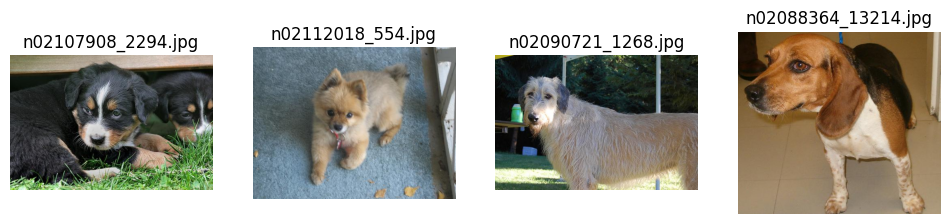

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

image_dir = '/content/Images'

num_images_per_breed = 1

total_images_to_display = 4

subdirs = [os.path.join(image_dir, d) for d in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, d))]

selected_images = []
for subdir in random.sample(subdirs, total_images_to_display):
    images = os.listdir(subdir)
    selected_image = random.choice(images)
    selected_images.append(os.path.join(subdir, selected_image))

plt.figure(figsize=(12, 12))
for i, img_path in enumerate(selected_images):
    plt.subplot(1, len(selected_images), i + 1)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(img_path))
plt.show()


## Affichage d'images avec les dimensions correspondantes

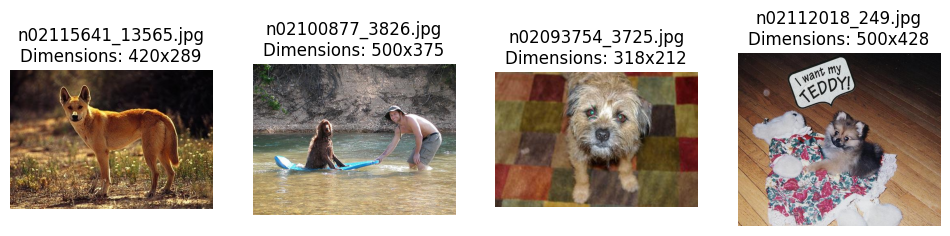

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

image_dir = '/content/Images'

total_images_to_display = 4

subdirs = [os.path.join(image_dir, d) for d in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, d))]

selected_images = []
for subdir in random.sample(subdirs, total_images_to_display):
    images = os.listdir(subdir)
    selected_image = random.choice(images)
    selected_images.append(os.path.join(subdir, selected_image))

plt.figure(figsize=(12, 12))
for i, img_path in enumerate(selected_images):
    plt.subplot(1, len(selected_images), i + 1)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')

    width, height = img.size
    plt.title(f"{os.path.basename(img_path)}\nDimensions: {width}x{height}")
plt.show()


In [ ]:
pip install pillow


# Section 5: Prétraitement <a name="section-5"></a>

## Affectation de l'extension (.xml) aux annotations

In [ ]:
import os

annotations_dir = '/content/Annotation'

for subdir, dirs, files in os.walk(annotations_dir):
    for filename in files:
        if '.' not in filename:
            old_file = os.path.join(subdir, filename)
            new_file = os.path.join(subdir, filename + '.xml')

            os.rename(old_file, new_file)
            print(f"Renamed {old_file} to {new_file}")

print("All annotation files in subdirectories have been given an .xml extension.")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Renamed /content/Annotation/n02099267-flat-coated_retriever/n02099267_808 to /content/Annotation/n02099267-flat-coated_retriever/n02099267_808.xml
Renamed /content/Annotation/n02099267-flat-coated_retriever/n02099267_4562 to /content/Annotation/n02099267-flat-coated_retriever/n02099267_4562.xml
Renamed /content/Annotation/n02099267-flat-coated_retriever/n02099267_1274 to /content/Annotation/n02099267-flat-coated_retriever/n02099267_1274.xml
Renamed /content/Annotation/n02099267-flat-coated_retriever/n02099267_4048 to /content/Annotation/n02099267-flat-coated_retriever/n02099267_4048.xml
Renamed /content/Annotation/n02099267-flat-coated_retriever/n02099267_1753 to /content/Annotation/n02099267-flat-coated_retriever/n02099267_1753.xml
Renamed /content/Annotation/n02099267-flat-coated_retriever/n02099267_2379 to /content/Annotation/n02099267-flat-coated_retriever/n02099267_2379.xml
Renamed /content/Annotation/n0

## recadrer les images avec les annotations

In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
from tqdm import tqdm

def parse_annotation(annotation_path):
    """
    Parse an XML file and return the bounding box coordinates.
    """
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    boxes = []
    for object in root.findall('object'):
        bndbox = object.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        boxes.append((xmin, ymin, xmax, ymax))
    return boxes

def crop_image(image_path, box, output_path):
    """
    Crop an image to the specified bounding box, convert it to RGB if necessary, and save it.
    """
    with Image.open(image_path) as img:
        img_cropped = img.crop(box)

        if img_cropped.mode == 'RGBA':
            img_cropped = img_cropped.convert('RGB')

        img_cropped.save(output_path)

image_dir = '/content/Images'
annotation_dir = '/content/Annotation'
cropped_images_dir = '/content/cropped_images'

if not os.path.exists(cropped_images_dir):
    os.makedirs(cropped_images_dir)

for breed_folder in tqdm(os.listdir(annotation_dir)):
    breed_annotation_dir = os.path.join(annotation_dir, breed_folder)
    breed_image_dir = os.path.join(image_dir, breed_folder)
    breed_cropped_dir = os.path.join(cropped_images_dir, breed_folder)

    if not os.path.exists(breed_cropped_dir):
        os.makedirs(breed_cropped_dir)

    for annotation_file in os.listdir(breed_annotation_dir):
        if annotation_file.endswith('.xml'):
            annotation_path = os.path.join(breed_annotation_dir, annotation_file)
            image_file_name = annotation_file.replace('.xml', '.jpg')
            image_path = os.path.join(breed_image_dir, image_file_name)

            if not os.path.exists(image_path):
                print(f"Image not found: {image_path}")
                continue

            boxes = parse_annotation(annotation_path)
            for i, box in enumerate(boxes):
                cropped_filename = f"{os.path.splitext(image_file_name)[0]}_crop{i}.jpg"
                cropped_image_path = os.path.join(breed_cropped_dir, cropped_filename)
                crop_image(image_path, box, cropped_image_path)

100%|██████████| 120/120 [01:12<00:00,  1.66it/s]


## Affichage d'images recadrées (rognées)

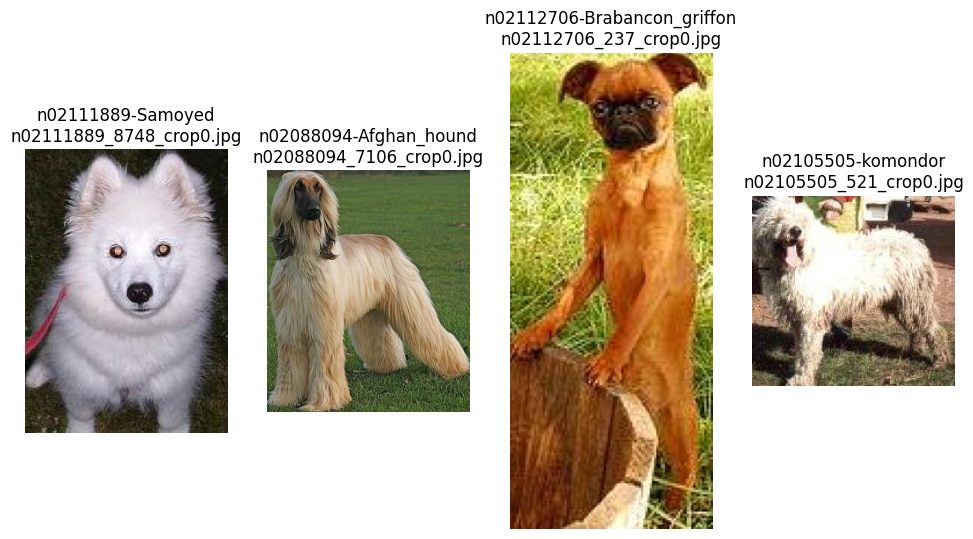

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

cropped_image_dir = '/content/cropped_images'

if not os.path.exists(cropped_image_dir):
    print(f"Le répertoire {cropped_image_dir} n'existe pas.")
else:
    breed_folders = os.listdir(cropped_image_dir)

    if not breed_folders:
        print("Aucun sous-dossier trouvé dans le répertoire.")
    else:
        plt.figure(figsize=(12, 8))
        for i in range(4):
            breed_folder = random.choice(breed_folders)
            breed_folder_path = os.path.join(cropped_image_dir, breed_folder)
            image_files = os.listdir(breed_folder_path)

            if image_files:
                img_file = random.choice(image_files)
                img_path = os.path.join(breed_folder_path, img_file)

                try:
                    img = Image.open(img_path)
                    plt.subplot(1, 4, i + 1)
                    plt.imshow(img)
                    plt.title(f"{breed_folder}\n{img_file}")
                    plt.axis('off')
                except IOError:
                    print(f"Erreur lors de l'ouverture de l'image : {img_path}")
            else:
                print(f"Aucune image trouvée dans le sous-dossier : {breed_folder}")

        plt.show()


## Image Originale vs Cropped Image

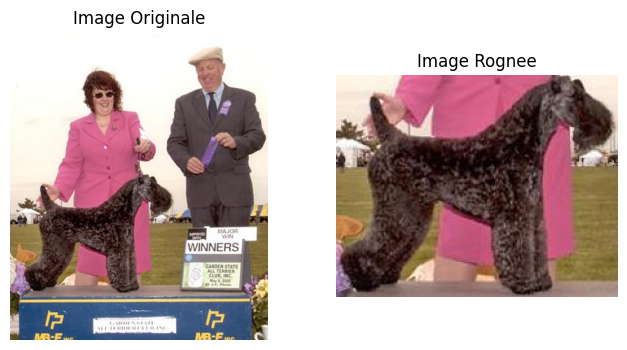

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def find_cropped_image(cropped_dir, base_name):
    """
    Trouver l'image rognée correspondante en cherchant un fichier qui commence par base_name.
    """
    for file in os.listdir(cropped_dir):
        if file.startswith(base_name):
            return file
    return None

original_img_path = "/content/Images/n02093859-Kerry_blue_terrier/n02093859_1218.jpg"
cropped_dir = "/content/cropped_images/n02093859-Kerry_blue_terrier"

base_name = os.path.basename(original_img_path).split('.')[0]

cropped_img_name = find_cropped_image(cropped_dir, base_name)
if cropped_img_name:
    cropped_img_path = os.path.join(cropped_dir, cropped_img_name)

    try:
        original_img = Image.open(original_img_path)
        cropped_img = Image.open(cropped_img_path)

        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.title("Image Originale")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cropped_img)
        plt.title("Image Rognee")
        plt.axis('off')

        plt.show()

    except IOError as e:
        print(f"Erreur lors de l'ouverture de l'une des images: {e}")
else:
    print(f"Aucune image rognée trouvée pour {base_name}")


## Affichage des valeurs des pixels d'images rognées

In [ ]:
import os
import random
import numpy as np
from PIL import Image

cropped_image_dir = '/content/cropped_images'

if not os.path.exists(cropped_image_dir):
    print(f"Le répertoire {cropped_image_dir} n'existe pas.")
else:
    all_files = []
    for subdir, _, files in os.walk(cropped_image_dir):
        for file in files:
            full_path = os.path.join(subdir, file)
            all_files.append(full_path)

    if len(all_files) < 2:
        print("Pas assez d'images dans le répertoire.")
    else:
        selected_images = random.sample(all_files, 2)

        for img_path in selected_images:
            img = Image.open(img_path)
            img_array = np.array(img)
            print(f"Valeurs des pixels pour l'image {img_path}:\n{img_array}\n")


Valeurs des pixels pour l'image /content/cropped_images/n02106382-Bouvier_des_Flandres/n02106382_1173_crop0.jpg:
[[[127 142  37]
  [123 138  33]
  [120 135  30]
  ...
  [122 127  25]
  [135 140  37]
  [145 152  48]]

 [[120 135  30]
  [118 133  28]
  [119 134  29]
  ...
  [137 139  38]
  [136 141  39]
  [139 146  42]]

 [[123 139  32]
  [122 138  31]
  [121 136  31]
  ...
  [143 145  44]
  [137 142  40]
  [131 136  34]]

 ...

 [[124 124  26]
  [138 138  40]
  [147 147  47]
  ...
  [130 133  54]
  [140 144  50]
  [141 146  44]]

 [[118 120  19]
  [155 157  56]
  [158 160  59]
  ...
  [116 120  36]
  [135 139  44]
  [141 146  43]]

 [[117 119  18]
  [155 157  56]
  [159 161  60]
  ...
  [134 138  53]
  [143 147  50]
  [149 154  51]]]

Valeurs des pixels pour l'image /content/cropped_images/n02097209-standard_schnauzer/n02097209_3811_crop0.jpg:
[[[227 214 161]
  [188 175 123]
  [180 168 120]
  ...
  [134 117 109]
  [178 161 154]
  [158 141 134]]

 [[189 175 128]
  [164 151 106]
  [137 12

## Redimension des images rognées

In [ ]:
import os
from PIL import Image
from tqdm import tqdm

def resize_and_convert_images(source_dir, target_dir, new_size=(224, 224)):
    """
    Resize all images in the source directory, convert them to RGB mode if necessary,
    and save them to the target directory.
    """
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for root, dirs, files in os.walk(source_dir):
        for name in tqdm(files):
            if name.endswith((".jpg", ".jpeg", ".png")):
                file_path = os.path.join(root, name)
                with Image.open(file_path) as img:
                    if img.mode == 'RGBA':
                        img = img.convert('RGB')

                    img_resized = img.resize(new_size, Image.ANTIALIAS)

                    rel_path = os.path.relpath(file_path, source_dir)
                    resized_file_path = os.path.join(target_dir, rel_path)

                    os.makedirs(os.path.dirname(resized_file_path), exist_ok=True)

                    img_resized.save(resized_file_path, format='JPEG')

source_dir = '/content/cropped_images'
target_dir = '/content/ResizedCroppedImages'

resize_and_convert_images(source_dir, target_dir, new_size=(224, 224))


0it [00:00, ?it/s]
  0%|          | 0/163 [00:00<?, ?it/s]<ipython-input-14-7262472a700c>:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(new_size, Image.ANTIALIAS)
100%|██████████| 153/153 [00:00<00:00, 197.55it/s]


## Normalisation de CroppedImages

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

resized_image_dir = '/content/ResizedCroppedImages'

image_generator = ImageDataGenerator(rescale=1./255)

image_data = image_generator.flow_from_directory(
    resized_image_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


Found 22126 images belonging to 120 classes.


## Affichage des pixels après normalisation

Pixel values for Image 1 (normalized): 
[[[0.07450981 0.08627451 0.0509804 ]
  [0.05490196 0.06666667 0.03137255]
  [0.0509804  0.05490196 0.02352941]
  ...
  [0.28627452 0.20784315 0.20392159]
  [0.31764707 0.24705884 0.2392157 ]
  [0.3529412  0.28235295 0.27450982]]

 [[0.07058824 0.08235294 0.04705883]
  [0.07058824 0.08235294 0.04705883]
  [0.08235294 0.08627451 0.05490196]
  ...
  [0.17254902 0.09411766 0.09019608]
  [0.20000002 0.12941177 0.12156864]
  [0.23529413 0.16470589 0.15686275]]

 [[0.08235294 0.09411766 0.05882353]
  [0.1137255  0.1254902  0.09019608]
  [0.14509805 0.14901961 0.11764707]
  ...
  [0.14509805 0.07058824 0.05490196]
  [0.14509805 0.07058824 0.05490196]
  [0.16470589 0.09019608 0.07450981]]

 ...

 [[0.49411768 0.5882353  0.36078432]
  [0.2509804  0.34901962 0.09411766]
  [0.36862746 0.47058827 0.18431373]
  ...
  [0.6509804  0.76470596 0.5019608 ]
  [0.5882353  0.69411767 0.43137258]
  [0.5019608  0.6156863  0.3529412 ]]

 [[0.7019608  0.79215693 0.5725490

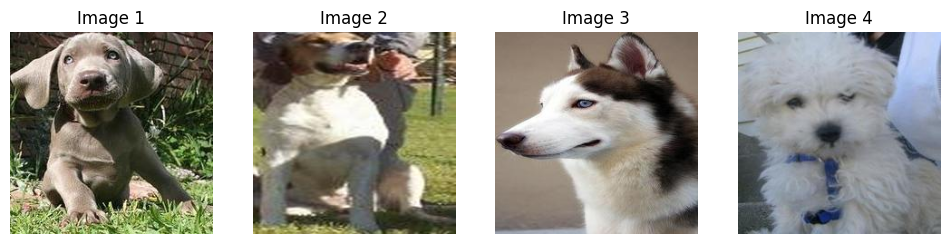

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, _ = next(image_data)

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"Image {i+1}")

    print(f"Pixel values for Image {i+1} (normalized): \n{images[i]}\n")

plt.show()


## Association des Images avec leurs Étiquettes


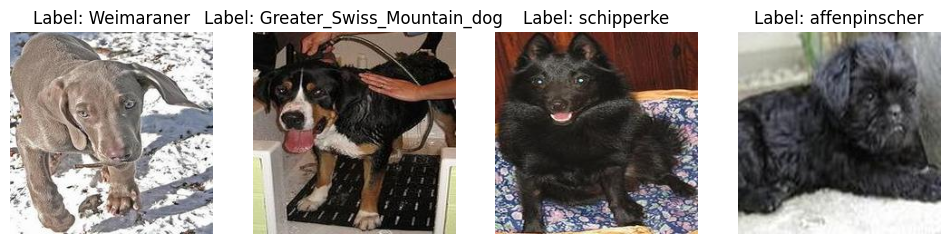

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image

images_dir = '/content/ResizedCroppedImages'

image_labels = []

for breed in os.listdir(images_dir):
    breed_dir = os.path.join(images_dir, breed)
    for image in os.listdir(breed_dir):
        image_path = os.path.join(breed_dir, image)

        breed_name = breed.split('-')[1] if '-' in breed else breed

        image_labels.append((image_path, breed_name))

selected_images_labels = random.sample(image_labels, 4)

plt.figure(figsize=(12, 8))

for i, (img_path, breed_name) in enumerate(selected_images_labels):
    img = Image.open(img_path)

    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {breed_name}")
    plt.axis('off')

plt.show()


# Section 6: Modèle <a name="section-6"></a>

# Train Test Split

In [ ]:
import os
import random

images_dir = '/content/ResizedCroppedImages'

train_data = []
val_data = []
test_data = []

train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15

for breed in os.listdir(images_dir):
    breed_dir = os.path.join(images_dir, breed)
    images = [(os.path.join(breed_dir, img), breed) for img in os.listdir(breed_dir)]

    random.shuffle(images)

    n_total = len(images)
    n_train = int(n_total * train_ratio)
    n_val = int(n_total * val_ratio)

    train_data.extend(images[:n_train])
    val_data.extend(images[n_train:n_train + n_val])
    test_data.extend(images[n_train + n_val:])

print(f"Total Training Data: {len(train_data)}")
print(f"Total Validation Data: {len(val_data)}")
print(f"Total Test Data: {len(test_data)}")


Total Training Data: 15432
Total Validation Data: 3262
Total Test Data: 3432


## CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(os.listdir(images_dir)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/ResizedCroppedImages',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 22126 images belonging to 120 classes.


In [ ]:
val_generator = val_test_datagen.flow_from_directory(images_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')


Found 22126 images belonging to 120 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_data) // 32,
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_data) // 32
)


<ipython-input-32-4d67783e023d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
482/482 [==============================] - 1231s 3s/step - loss: 5.3138 - accuracy: 0.0094 - val_loss: 4.7838 - val_accuracy: 0.0127
Epoch 2/10
482/482 [==============================] - 1231s 3s/step - loss: 4.7819 - accuracy: 0.0109 - val_loss: 4.7812 - val_accuracy: 0.0127
Epoch 3/10
482/482 [==============================] - 1244s 3s/step - loss: 4.7799 - accuracy: 0.0114 - val_loss: 4.7781 - val_accuracy: 0.0145
Epoch 4/10
482/482 [==============================] - 1232s 3s/step - loss: 4.7785 - accuracy: 0.0134 - val_loss: 4.7758 - val_accuracy: 0.0130
Epoch 5/10
482/482 [==============================] - 1238s 3s/step - loss: 4.7765 - accuracy: 0.0134 - val_loss: 4.7805 - val_accuracy: 0.0127
Epoch 6/10
482/482 [==============================] - 1228s 3s/step - loss: 4.7770 - accuracy: 0.0134 - val_loss: 4.7761 - val_accuracy: 0.0108
Epoch 7/10
482/482 [==============================] - 1214s 3s/step - loss: 4.7771 - accuracy: 0.0130 - val_loss: 4.7793 - val_accuracy:

In [ ]:
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)


692/692 [==============================] - 321s 463ms/step
